<a href="https://colab.research.google.com/github/Laureoby/online_sale_dataset/blob/main/Online_sale_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/drive/MyDrive/Online_Sales_Data.csv')
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
data.isnull().sum()

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop('Transaction ID',axis=1,inplace=True)
data.head()

,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              240 non-null    object 
 1   Product Category  240 non-null    object 
 2   Product Name      240 non-null    object 
 3   Units Sold        240 non-null    int64  
 4   Unit Price        240 non-null    float64
 5   Total Revenue     240 non-null    float64
 6   Region            240 non-null    object 
 7   Payment Method    240 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.1+ KB


**Data visualization and users stories**

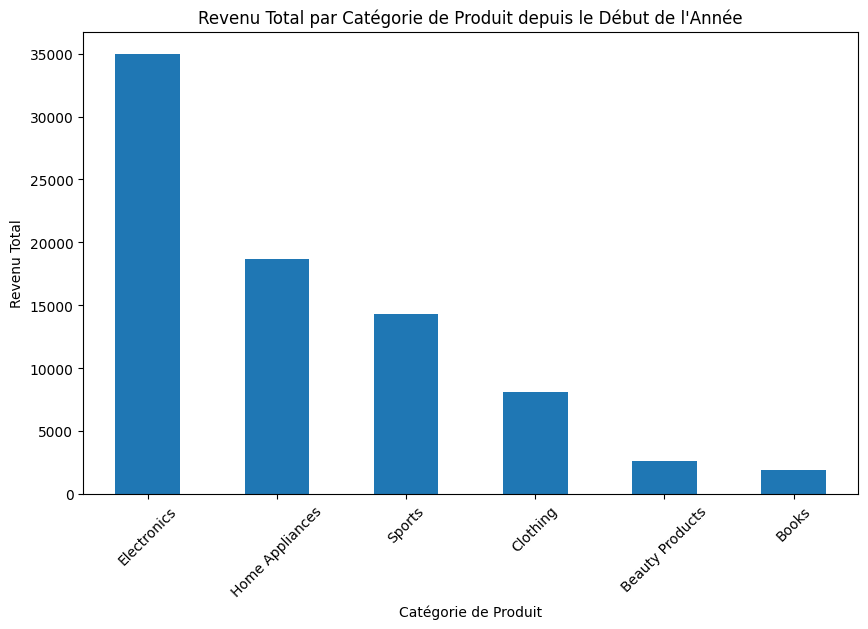

In [11]:
revenue_by_category = data.groupby('Product Category')['Total Revenue'].sum()
# Trier les données
sorted_revenue = revenue_by_category.sort_values(ascending=False)
# Afficher les résultats
# Créer un graphique en barres
plt.figure(figsize=(10, 6))
sorted_revenue.plot(kind='bar')
plt.title('Revenu Total par Catégorie de Produit depuis le Début de l\'Année')
plt.xlabel('Catégorie de Produit')
plt.ylabel('Revenu Total')
plt.xticks(rotation=45)
plt.show()

User story: As a product manager, I need to evaluate the performance of each product category in different regions to determine market preferences and regional demand. This analysis will inform product development and regional marketing strategies.

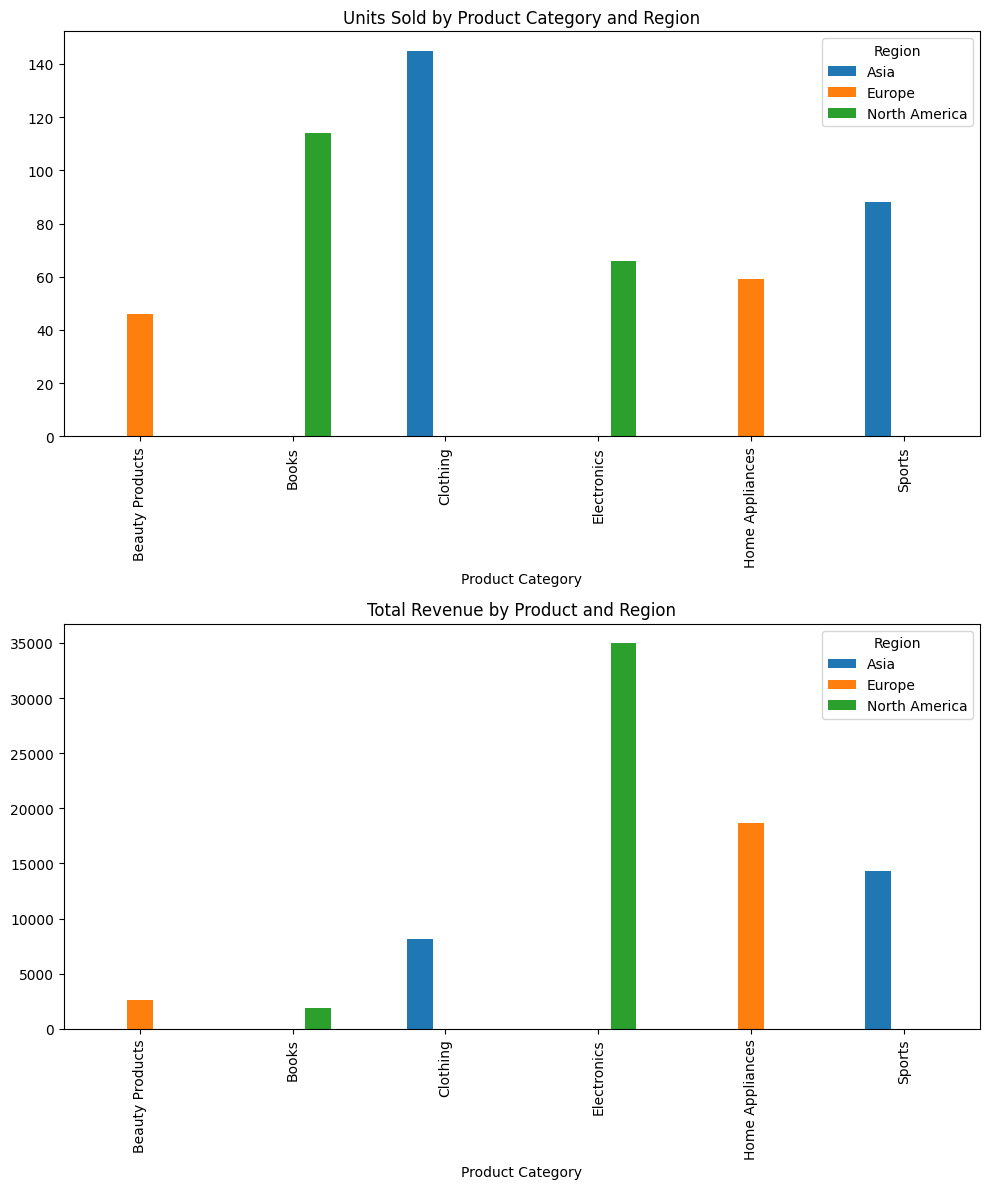

In [14]:
# Group by Product Category and Region, then calculate sum of Units Sold and Total Revenue
grouped_data = data.groupby(['Product Category', 'Region']).agg({
    'Units Sold': 'sum',
    'Total Revenue': 'sum'
}).reset_index()

# Pivot the data for better visualization
pivot_data = grouped_data.pivot(index='Product Category', columns='Region', values=['Units Sold', 'Total Revenue'])

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
pivot_data['Units Sold'].plot(kind='bar', ax=axes[0], title='Units Sold by Product Category and Region')
pivot_data['Total Revenue'].plot(kind='bar', ax=axes[1], title='Total Revenue by Product and Region')

plt.tight_layout()
plt.show()

User story: As a business strategist, I need to compare the sales data across different time periods to assess the impact of specific promotional campaigns or seasonal effects on sales. This will help in planning future promotional activities and managing stock levels more effectively.

In [15]:
# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as the index of the dataframe
data.set_index('Date', inplace=True)

# Resample data monthly to see monthly trends
monthly_sales = data.resample('M').agg({
    'Total Revenue': 'sum',  # Sum of revenue per month
    'Units Sold': 'sum'      # Sum of units sold per month
})

# Calculate the percentage change month-over-month to see growth or decline
monthly_sales['Revenue Growth'] = monthly_sales['Total Revenue'].pct_change() * 100
monthly_sales['Units Sold Growth'] = monthly_sales['Units Sold'].pct_change() * 100

# Optionally, filter data by specific product categories or regions
# For example, filter by a promotional campaign category
filtered_sales = data[data['Product Category'] == 'Clothing'].resample('M').agg({
    'Total Revenue': 'sum',
    'Units Sold': 'sum'
})
filtered_sales['Revenue Growth'] = filtered_sales['Total Revenue'].pct_change() * 100
filtered_sales['Units Sold Growth'] = filtered_sales['Units Sold'].pct_change() * 100

# Print results
print(monthly_sales)
print(filtered_sales)

            Total Revenue  Units Sold  Revenue Growth  Units Sold Growth
Date                                                                    
2024-01-31       14548.32          68             NaN                NaN
2024-02-29       10803.37          77      -25.741460          13.235294
2024-03-31       12849.24          82       18.937332           6.493506
2024-04-30       12451.69          65       -3.093957         -20.731707
2024-05-31        8455.49          60      -32.093635          -7.692308
2024-06-30        7384.55          61      -12.665617           1.666667
2024-07-31        6797.08          53       -7.955393         -13.114754
2024-08-31        7278.11          52        7.077010          -1.886792
            Total Revenue  Units Sold  Revenue Growth  Units Sold Growth
Date                                                                    
2024-01-31        1789.84          16             NaN                NaN
2024-02-29        1284.81          19      -28.2164

As a sales analyst, I want to analyze the monthly sales trends for each product category so that I can identify which categories are performing well and which are underperforming. This will help in adjusting marketing efforts and inventory levels accordingly.

In [21]:
data.reset_index(inplace=True)
data.head()

,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month,Year
0,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1,2024
1,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1,2024
2,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1,2024
3,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1,2024
4,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1,2024


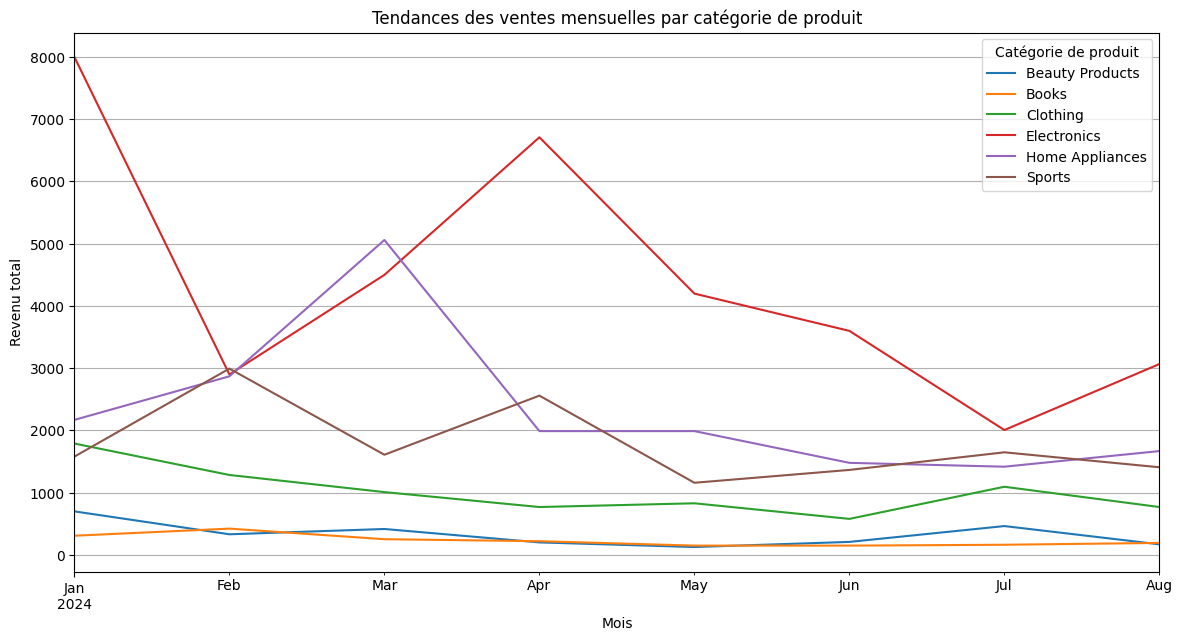

In [22]:
# Grouper les données par mois et catégorie de produit, et calculer la somme des revenus
monthly_sales = data.groupby([data['Date'].dt.to_period('M'), 'Product Category'])['Total Revenue'].sum().unstack(fill_value=0)

# Visualiser les tendances des ventes mensuelles pour chaque catégorie de produit
monthly_sales.plot(kind='line', figsize=(14, 7))
plt.title('Tendances des ventes mensuelles par catégorie de produit')
plt.xlabel('Mois')
plt.ylabel('Revenu total')
plt.grid(True)
plt.legend(title='Catégorie de produit')
plt.show()